# Diabetes Prediction with Support Vector Machines (SVM), Decision Tree (DT), and Random Forest (RF)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df=pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [7]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [10]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

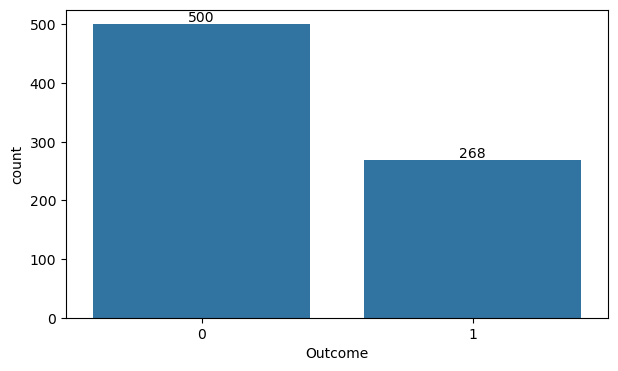

In [11]:
ax = sns.countplot(data=df, x="Outcome")
ax.bar_label(ax.containers[0]);

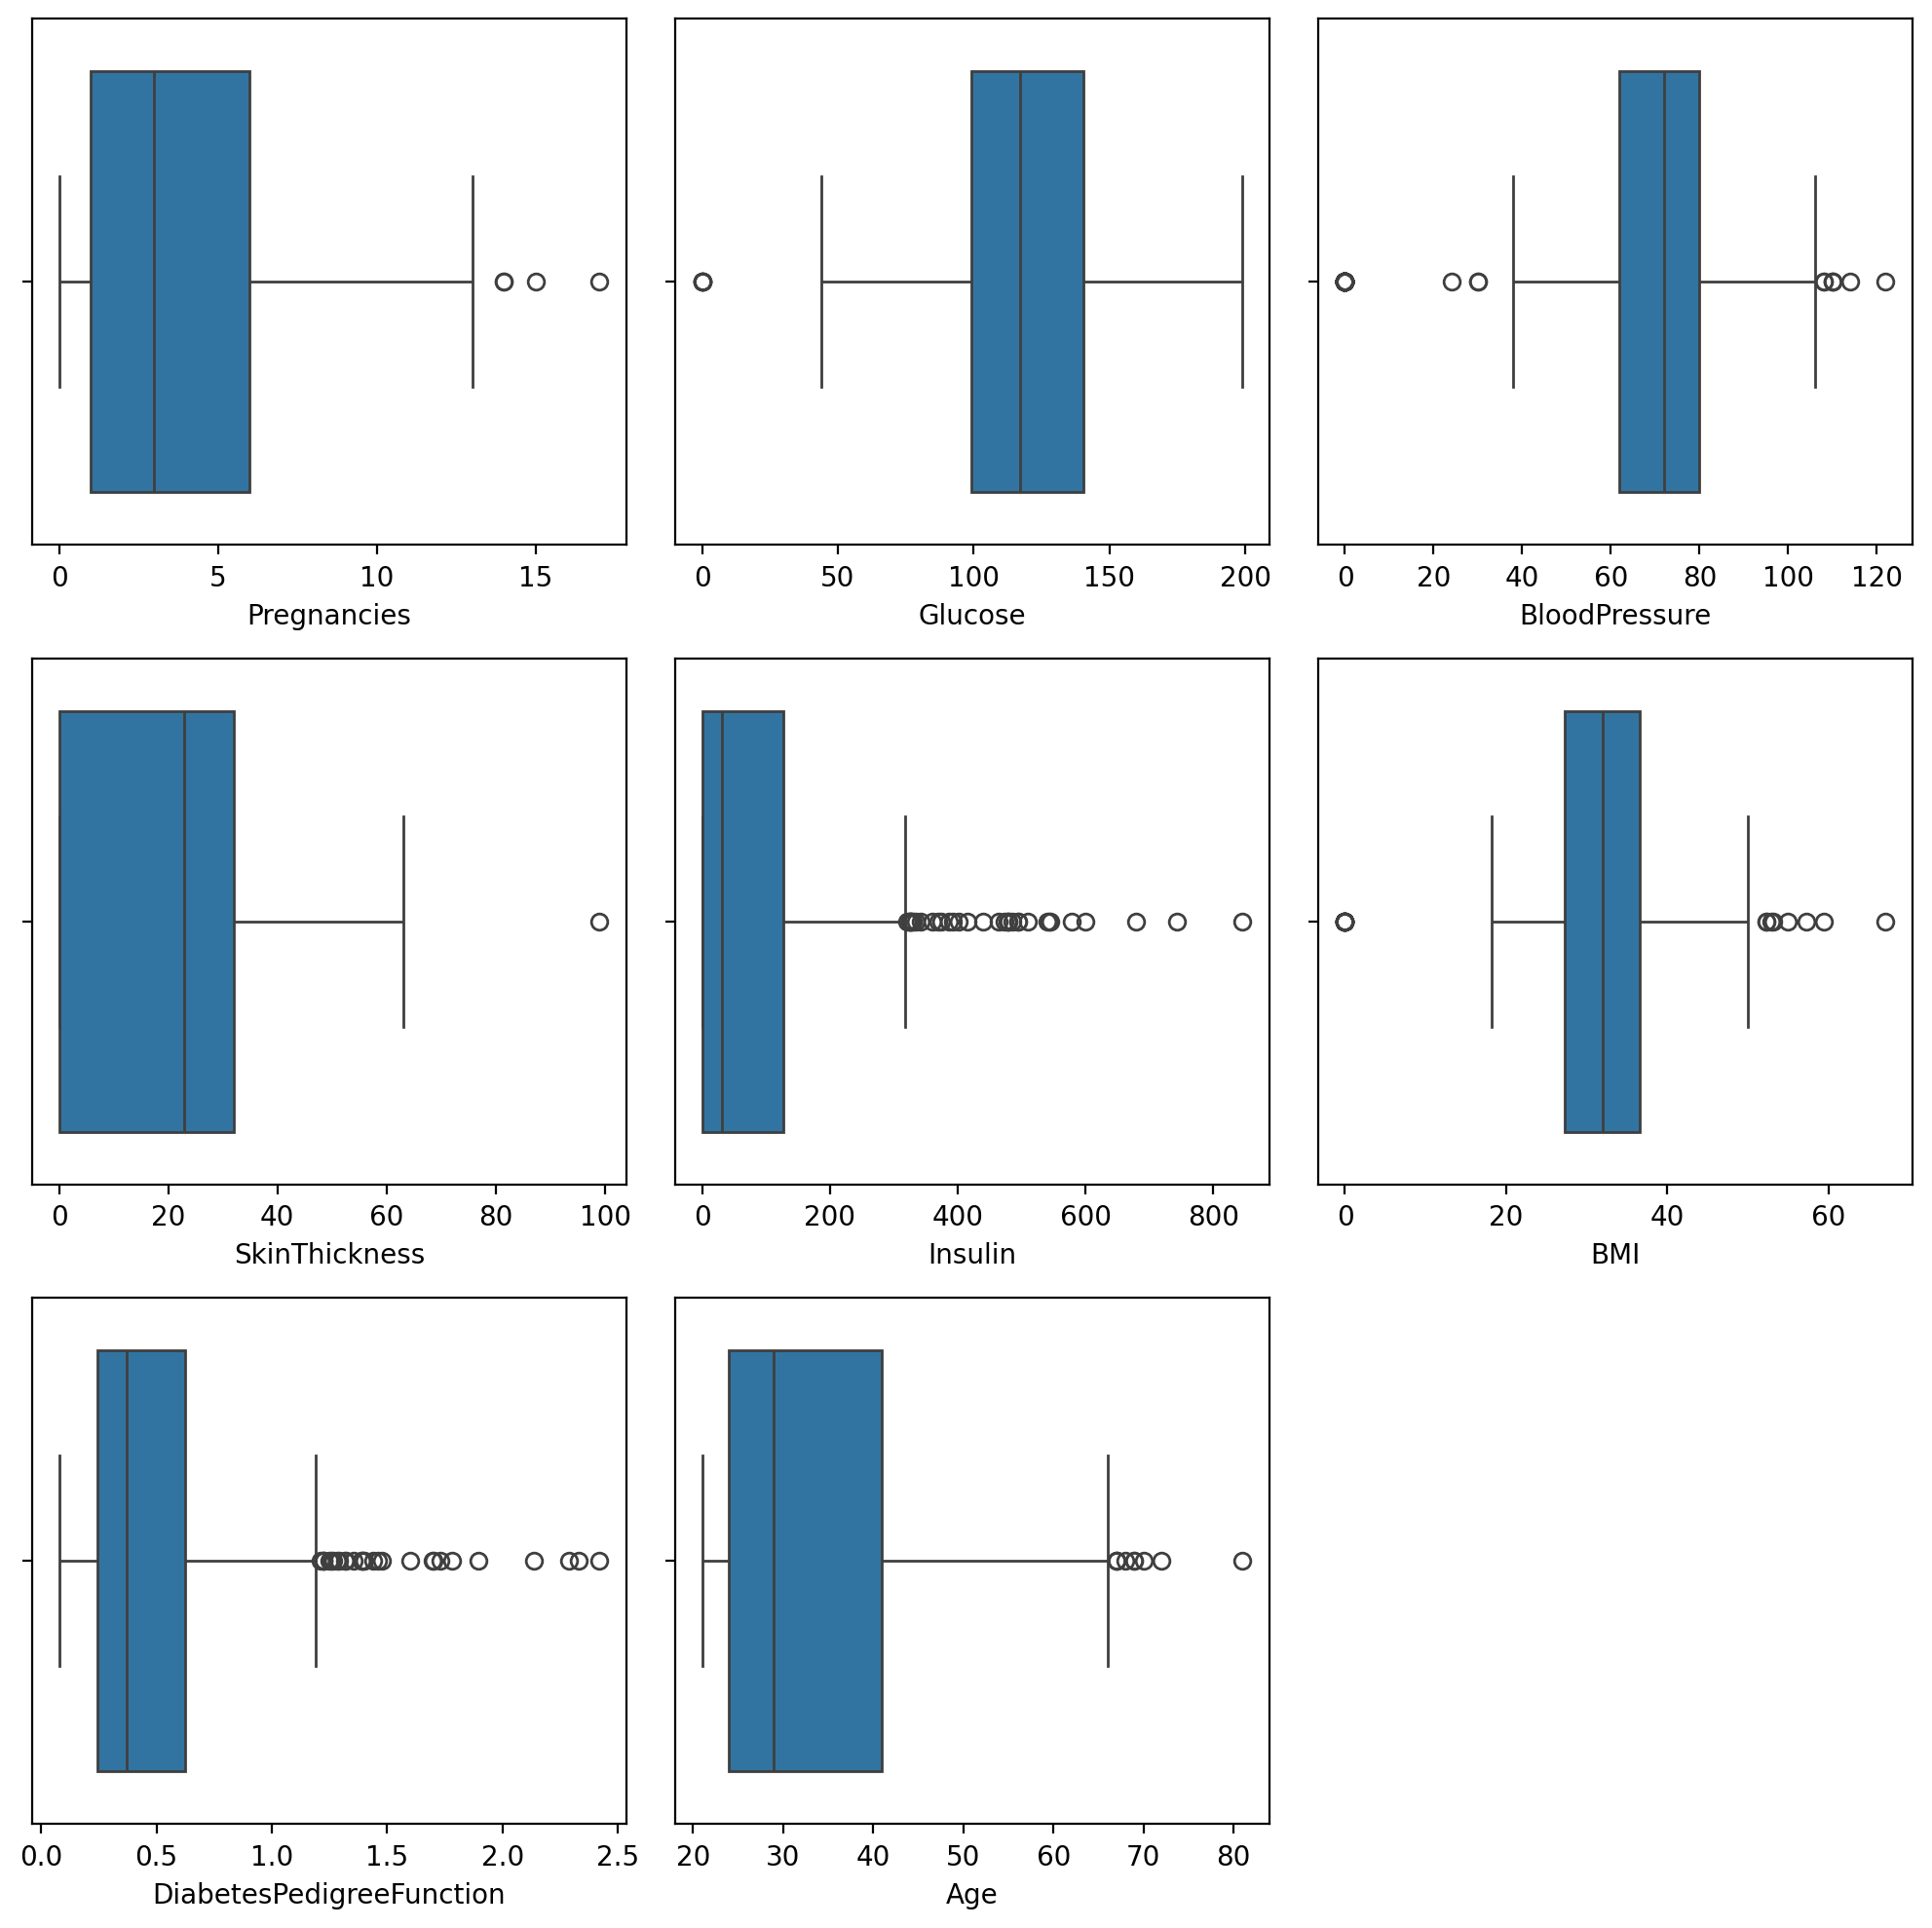

In [12]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(data=df, x=col)
        
plt.tight_layout();

In [13]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [14]:
df.shape

(720, 9)

In [15]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

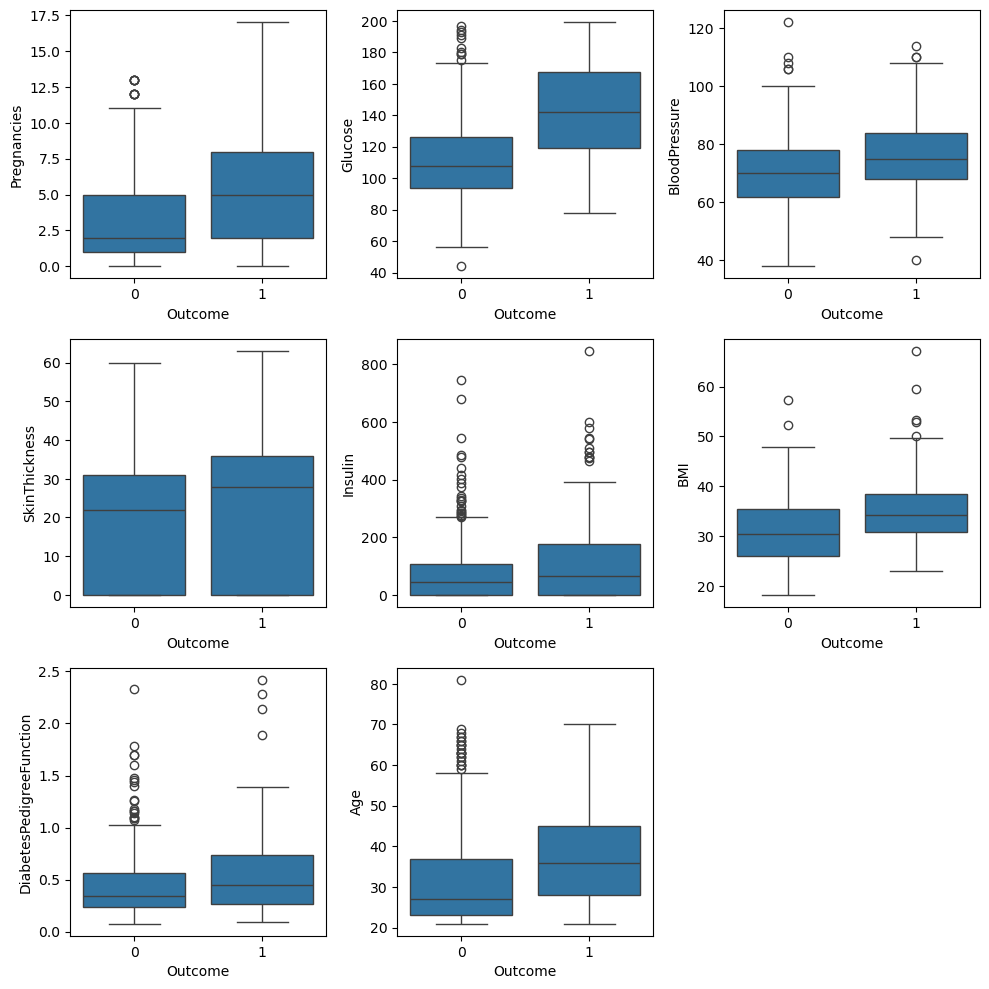

In [16]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x="Outcome", y=col, data=df)
        
plt.tight_layout();

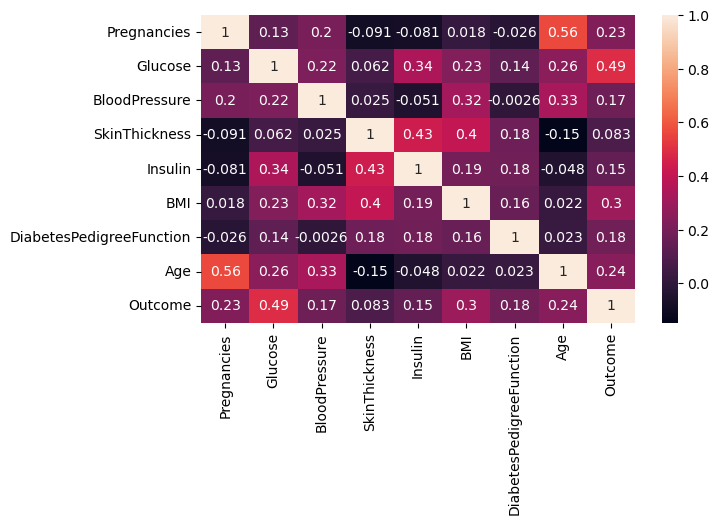

In [17]:
sns.heatmap(df.corr(), annot=True);

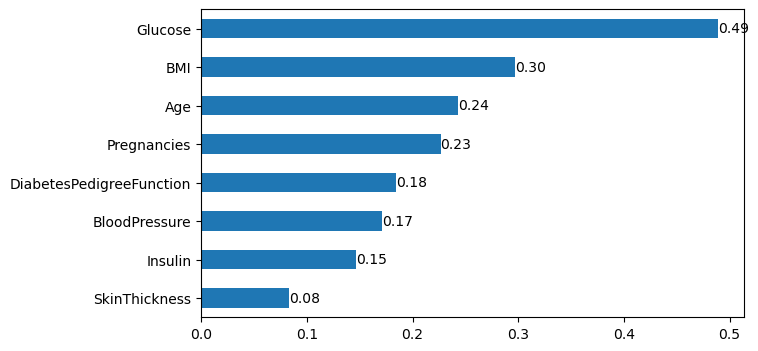

In [18]:
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

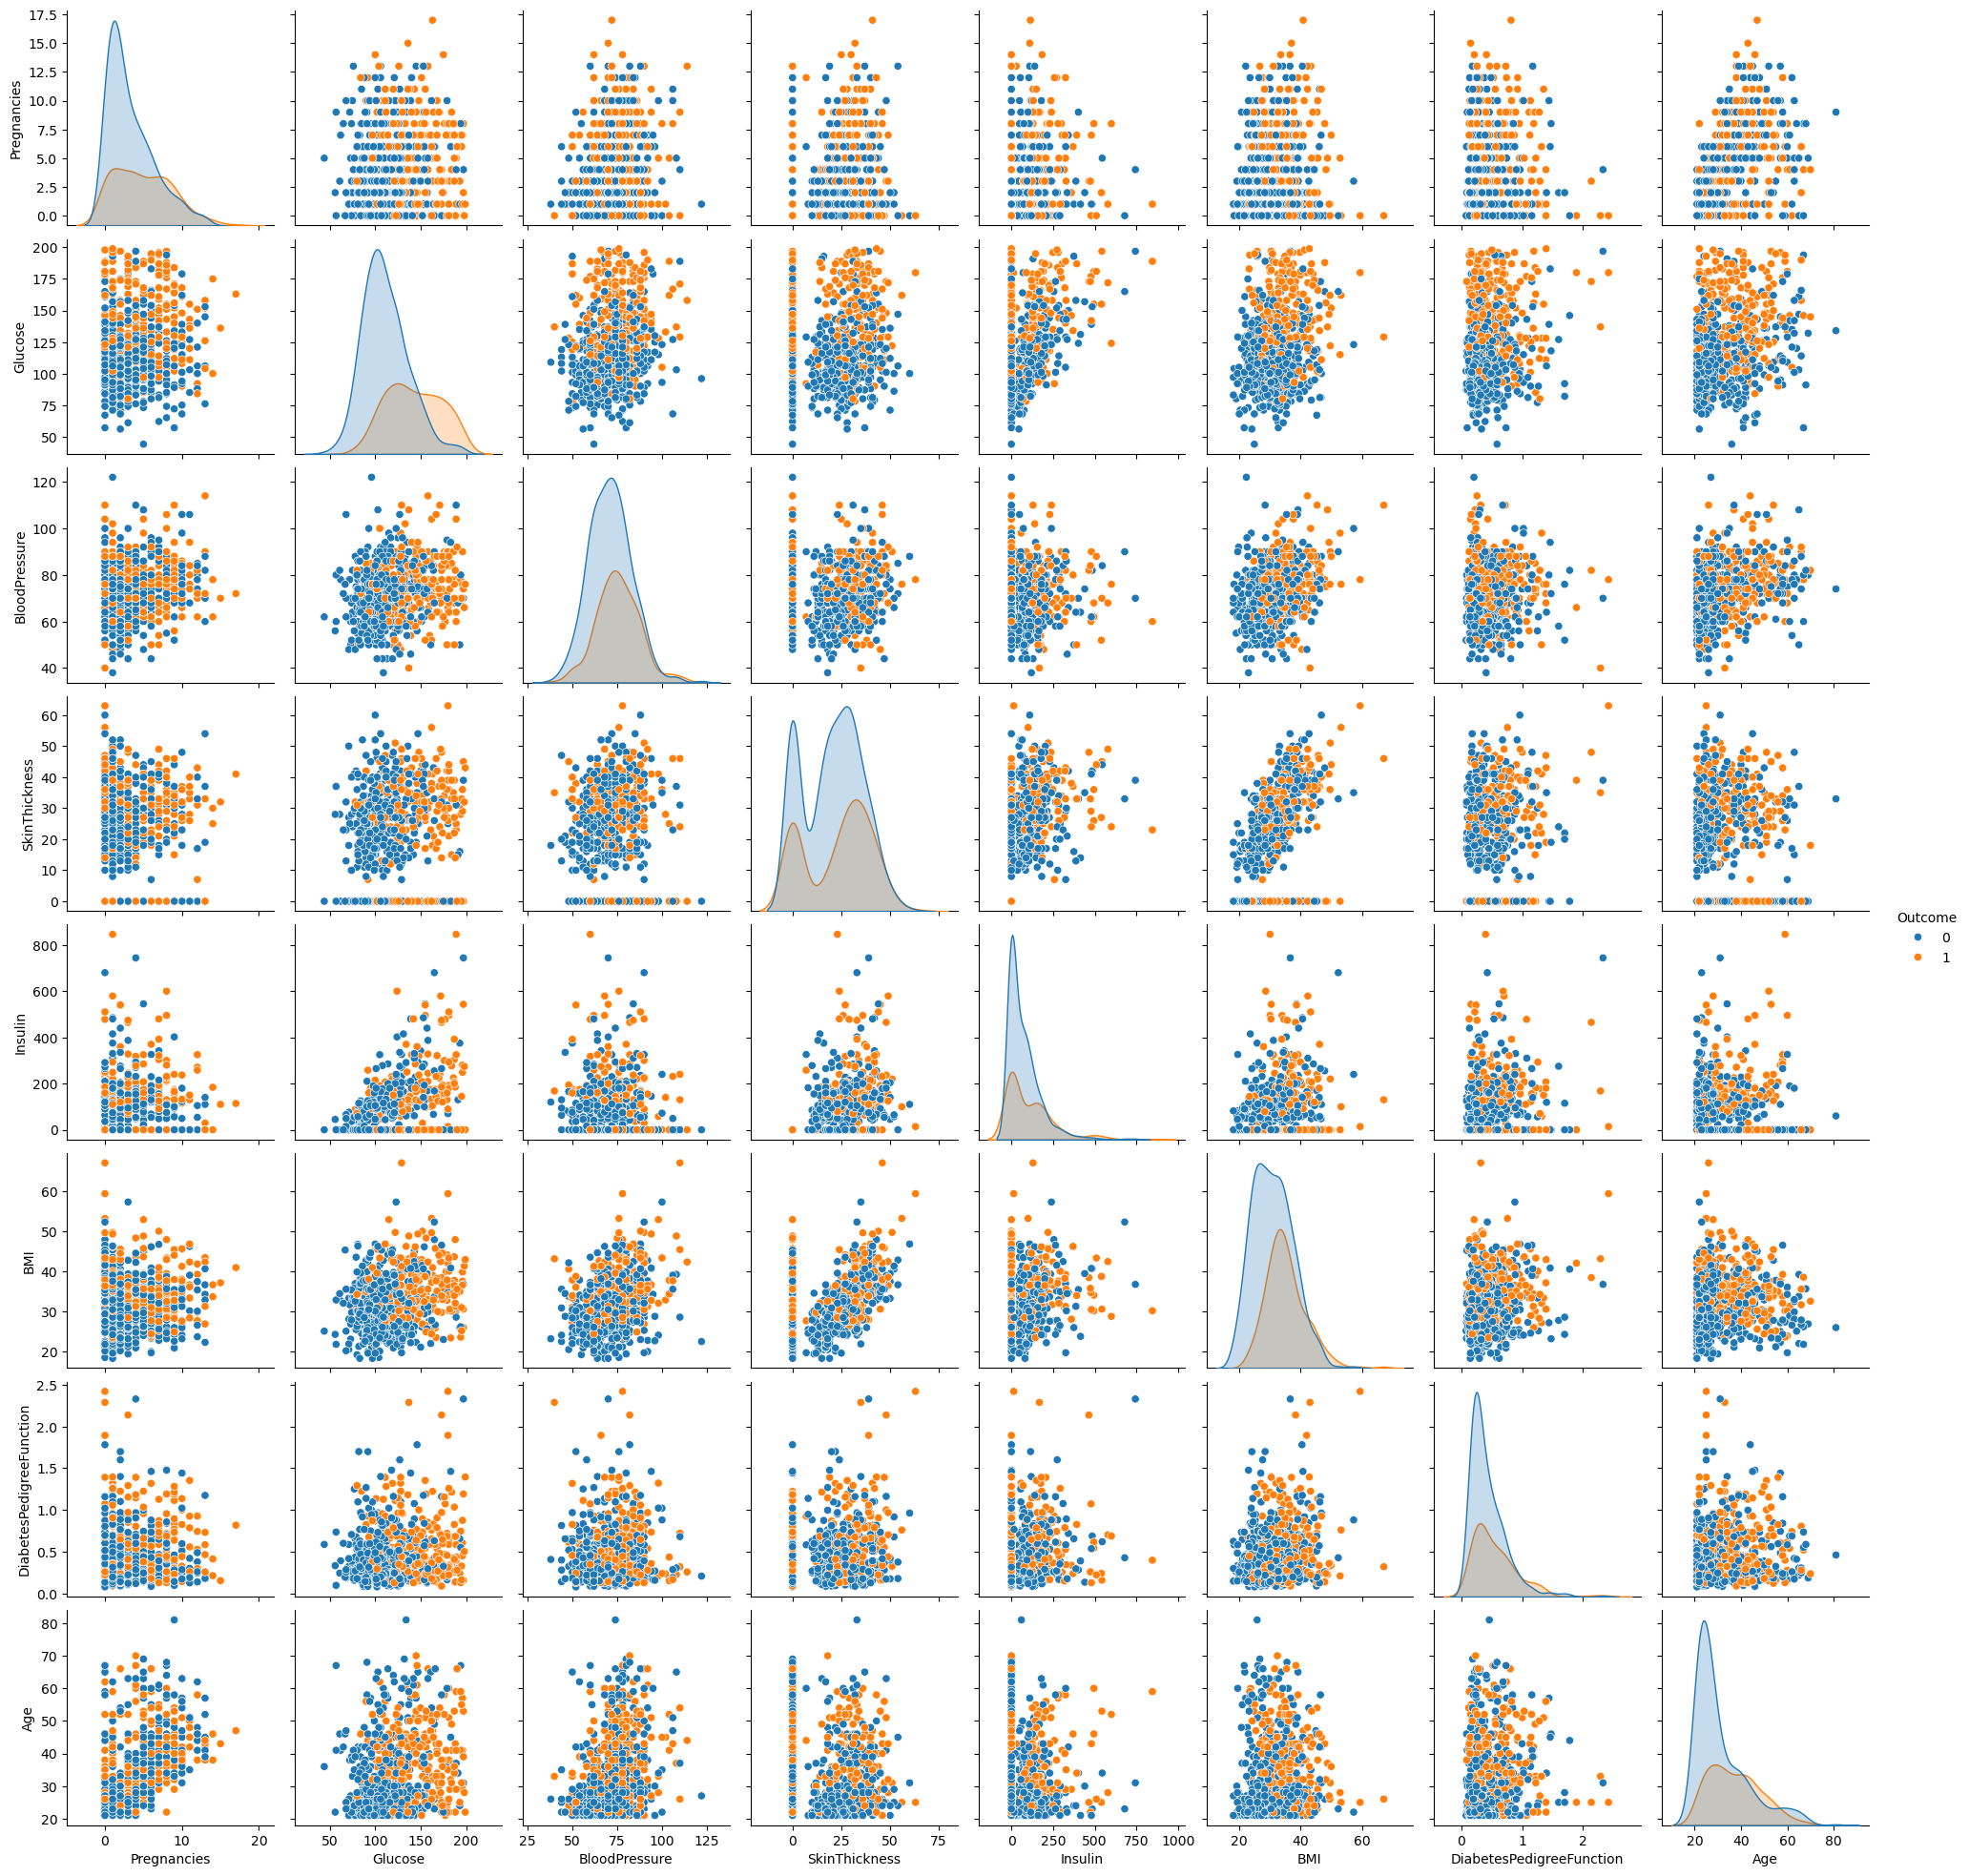

In [19]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=42)

## Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

# Since SVM is a distance based model, the data needs to be scaled.
# But we will continue without scaling first to see how the results change.

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [25]:
from sklearn.model_selection import cross_validate

model = SVC()

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.738
train_accuracy    0.757
test_precision    0.708
train_precision   0.736
test_recall       0.420
train_recall      0.455
test_f1           0.520
train_f1          0.562
dtype: float64

### With Scalling

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

# Now let's scale and observe the scores.
# If there is an imbalance in the data, we need to make it balanced first. So SVC(class_weight="balanced")
# if there is a gap between class 0 and class 1, the data is imbalanced.

In [28]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# If you look at the scores above, you'll see there's a big difference. 
# The importance of scaling is better understood.
# Recall is very different, it means imbalanced. (0.89 vs 0.59) 
# Both precision and recall values should be close. Otherwise there is overfitting. If precision is 1 and recall is 0.1, that's bad. 
# Precision has underestimated this class. If precission is 0.1 and recall is 1, that's also bad. The model's shaking. It's giving everyone a 1.
# Recall should be 1, precission should be as high as possible. Recall 1 means it catches all cancers.  

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [29]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# This is where we control overfiting. We have overfitting here. 

test_accuracy     0.752
train_accuracy    0.831
test_precision    0.673
train_precision   0.825
test_recall       0.536
train_recall      0.644
test_f1           0.594
train_f1          0.723
dtype: float64

### With Best Parameters (GridsearchCV)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

# We define our hyper-parameter space.
# C and gamma affect each other. Inversely proportional

In [32]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring="recall", # Freeze the metrics of class 1. This is only written in binary data
                              cv=10, 
                              return_train_score=True)

# SVC does not make prediction via predict_proba. Predictions via decision_function 
# does it via #. If we want to get predict_proba, SVC's probabilty 
# We need to set the hyper_parameter to True.
# We will explain what decision_funksion is below.

In [33]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [34]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.05, class_weight='balanced', gamma=0.3,
                     probability=True))])

In [36]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

# We do our overfiting check. This can mislead us because it looks at a single metric. We need to make a CV.

mean_test_score    0.894
mean_train_score   0.907
Name: 22, dtype: object

In [37]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



In [38]:
operations = [("scaler", StandardScaler()), 
              ("SVC", SVC(C= 0.05, 
                          gamma= 0.3, 
                          kernel= 'rbf', 
                          probability=True,                      
                          class_weight="balanced"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# There is no need to make CV again after gridsearch CV. 
# But if you want to see all metrics, of course you can.

test_accuracy     0.616
train_accuracy    0.632
test_precision    0.475
train_precision   0.482
test_recall       0.894
train_recall      0.907
test_f1           0.618
train_f1          0.629
dtype: float64

### Should the optimal best threshold be determined in the SVM model?

In [39]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

# SVC does the prediction via the decision_function function.
# positive values indicate class 1, negative values indicate class 0. 
# The larger the absolute value of decision_function, the further away the observation is from the hyper plane.

array([ 0.6092764 ,  0.84263767,  0.47386186, -0.28237901,  0.76803772,
       -0.62884362, -0.09844843,  0.86154427, -0.97054695, -0.05094376,
        0.18120991,  0.5170356 , -0.04729025, -0.47376938,  0.94867542,
        0.55804293, -0.86444305,  0.93325274,  0.69693388, -1.10693844,
        0.71138957, -0.25816866,  0.9809129 ,  0.09024727, -0.25546803,
        0.52555535, -0.59437495,  0.33109802, -0.03813883, -0.35114691,
        0.51298606,  0.32688323,  0.43189893,  0.08561673,  0.61718718,
       -0.28024343,  0.67107159,  0.35191176,  0.58870501,  0.24981652,
        0.37974359, -0.89770378, -0.88633092,  0.87825662,  0.6145391 ,
        0.22596048,  0.39718108,  0.63331752,  0.9535457 ,  0.30885256,
        0.49269475, -0.6579449 , -0.00484441, -0.64896428, -0.76417344,
        0.97359193,  0.59407135, -1.22009531,  0.67700748,  0.7735601 ,
        0.79203896,  0.65437864,  0.88127888,  1.04252632,  1.05901944,
       -0.9061641 ,  0.59385633,  0.07694606,  0.67040346, -0.74

In [40]:
predict_proba = svm_model_grid.predict_proba(X_test)[:,1]
predict_proba

# According to predict_proba, observations above 0.5 should be assigned to class 1 and observations below 0.5 should be assigned to class 0. 
# However, the 3rd observation is assigned to class 1 even though it is 0.44. 
# As you can see, predict_proba is not working properly in SVC, so we don't use predict_proba.

array([0.51722992, 0.65879423, 0.43235301, 0.10142347, 0.61687619,
       0.04661056, 0.15222145, 0.66943794, 0.01983577, 0.16834728,
       0.26669531, 0.45914592, 0.16964224, 0.06509731, 0.71617316,
       0.48491391, 0.02589339, 0.70819444, 0.57227804, 0.01407185,
       0.5813284 , 0.10712956, 0.73241841, 0.22425594, 0.10778329,
       0.46448174, 0.05075658, 0.34924835, 0.17292068, 0.08666351,
       0.45661423, 0.34696275, 0.40689226, 0.22222936, 0.52221492,
       0.10191576, 0.55607684, 0.36068688, 0.5       , 0.30189333,
       0.37637211, 0.02381988, 0.02450971, 0.67870448, 0.52054655,
       0.2893571 , 0.38641952, 0.53236935, 0.71866523, 0.33730165,
       0.44398126, 0.04336601, 0.185271  , 0.04434324, 0.03328305,
       0.72878132, 0.50764142, 0.01058029, 0.55979735, 0.62035764,
       0.63204014, 0.5456047 , 0.68036559, 0.76178077, 0.7692556 ,
       0.02331922, 0.50750578, 0.21846989, 0.55565797, 0.03495789,
       0.34005936, 0.33724894, 0.58601042, 0.2958303 , 0.58738

In [41]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

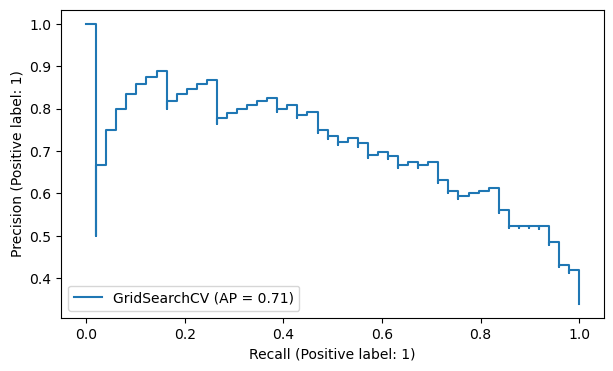

In [42]:
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# We can get average precision or AUC values via SVC model desion_function.

In [43]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve
average_precision_score(y_test, decision_function)

# We prefer the decision function as average_precision score.
# Because we know that the predict probe is not working properly.

0.7133065367791772

## Decision Tree

<Axes: ylabel='count'>

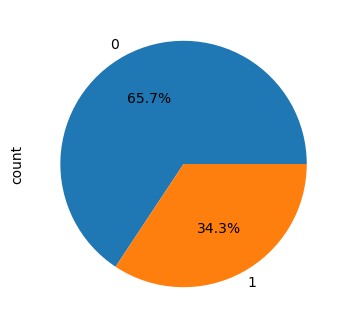

In [44]:
df.Outcome.value_counts().plot(kind="pie", autopct='%1.1f%%')

### Modelling and Model Performance

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

# I directly used class_weight = "balanced" since our data is unbalanced and my target label has a bad score. 
# There is no need to gridsearche class_weight in unbalanced data sets.

Test_Set
[[72 23]
 [22 27]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        95
           1       0.54      0.55      0.55        49

    accuracy                           0.69       144
   macro avg       0.65      0.65      0.65       144
weighted avg       0.69      0.69      0.69       144


Train_Set
[[378   0]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       198

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [55]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)


scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# checking the overfiting

test_accuracy     0.679
train_accuracy    1.000
test_precision    0.539
train_precision   1.000
test_recall       0.525
train_recall      1.000
test_f1           0.529
train_f1          1.000
dtype: float64

In [47]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 2, 3],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3,4,5]}

In [48]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=101)


dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            cv=10,
                            n_jobs=-1 
                            ).fit(X_train, y_train)

In [49]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_features=3,
                       min_samples_leaf=2, random_state=101, splitter='random')

In [50]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

# There seems to be no overfiting but we will do our final confirmation in CV.
# We will confirm our score by comparing the 1 scores in our target class Test data with the average value of the validation sets we will get from CV.

Test_Set
[[25 70]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.93      0.26      0.41        95
           1       0.40      0.96      0.57        49

    accuracy                           0.50       144
   macro avg       0.66      0.61      0.49       144
weighted avg       0.75      0.50      0.46       144


Train_Set
[[ 64 314]
 [  2 196]]
              precision    recall  f1-score   support

           0       0.97      0.17      0.29       378
           1       0.38      0.99      0.55       198

    accuracy                           0.45       576
   macro avg       0.68      0.58      0.42       576
weighted avg       0.77      0.45      0.38       576



In [51]:
model = DecisionTreeClassifier(class_weight='balanced', 
                               max_depth=2,
                               min_samples_leaf=2,
                               random_state=101, 
                               splitter='random')

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# No overfiting. The scores of the 1 class in the test data and the validation set are consistent.

test_accuracy     0.585
train_accuracy    0.610
test_precision    0.433
train_precision   0.486
test_recall       0.492
train_recall      0.535
test_f1           0.407
train_f1          0.460
dtype: float64

In [52]:
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, \
                            roc_auc_score, roc_curve, average_precision_score
#plot_precision_recall_curve, plot_roc_curve

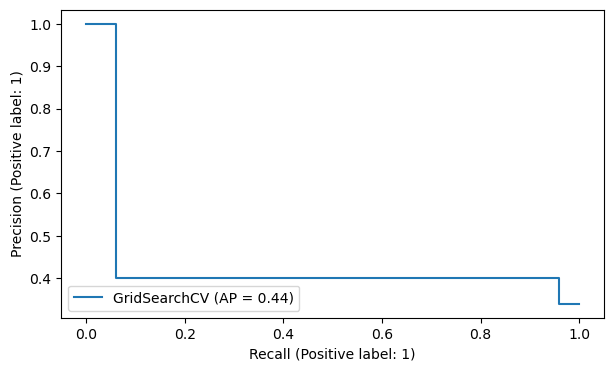

In [53]:
PrecisionRecallDisplay.from_estimator(dt_grid_model, X_test, y_test);

# the overall performance of the model is very low, i.e. the performance of separating class 1 from class 0 = 0.45

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier(class_weight="balanced", 
                                  random_state=101)
rf_model.fit(X_train, y_train)

# I directly used class_weight = "balanced" since our data is unbalanced and my target label has a bad score. 
# There is no need to gridsearche class_weight in unbalanced data sets.

RandomForestClassifier(class_weight='balanced', random_state=101)

In [58]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

# There seems to be overfiting

Test_Set
[[80 15]
 [18 31]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.67      0.63      0.65        49

    accuracy                           0.77       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.77      0.77      0.77       144


Train_Set
[[378   0]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       198

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [59]:
model = RandomForestClassifier(class_weight="balanced", 
                               random_state=101)

scores = cross_validate(model, 
                        X_train,
                        y_train, 
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv = 10,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# We have overfiting

test_accuracy     0.753
train_accuracy    1.000
test_precision    0.671
train_precision   1.000
test_recall       0.556
train_recall      1.000
test_f1           0.605
train_f1          1.000
dtype: float64

## GridSearch

In [60]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1.0]} # add 1

In [61]:
model = RandomForestClassifier(class_weight={0:1, 1:4},
                               random_state=101)
rf_grid_model = GridSearchCV(model, 
                             param_grid, 
                             scoring="recall", 
                             n_jobs = -1, 
                             verbose=2).fit(X_train, y_train)

# class_weight="balanced" was insufficient, so I weighted it even more with a ratio of 1 to 4.

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [62]:
rf_grid_model.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=64,
                       random_state=101)

In [63]:
rf_grid_model.best_score_

0.9548717948717951

In [64]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

# overfiting seems to be fixed but we will do our final confirmation in CV.
# We will confirm our score by comparing the 1 scores in our target class Test data with the average value of the validation sets we will get from CV.

Test_Set
[[39 56]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.95      0.41      0.57        95
           1       0.46      0.96      0.62        49

    accuracy                           0.60       144
   macro avg       0.70      0.68      0.60       144
weighted avg       0.78      0.60      0.59       144


Train_Set
[[152 226]
 [  3 195]]
              precision    recall  f1-score   support

           0       0.98      0.40      0.57       378
           1       0.46      0.98      0.63       198

    accuracy                           0.60       576
   macro avg       0.72      0.69      0.60       576
weighted avg       0.80      0.60      0.59       576



In [65]:
model = RandomForestClassifier(class_weight={0: 1, 1: 4}, 
                               max_depth=2, 
                               max_features=2,
                               max_samples=0.8, 
                               min_samples_leaf=2, 
                               n_estimators=64,
                               random_state=101)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# I confirmed that there is no overfiting. The scores of the 1 class in the test data and the validation set are consistent.

test_accuracy     0.582
train_accuracy    0.607
test_precision    0.453
train_precision   0.466
test_recall       0.955
train_recall      0.981
test_f1           0.613
train_f1          0.632
dtype: float64

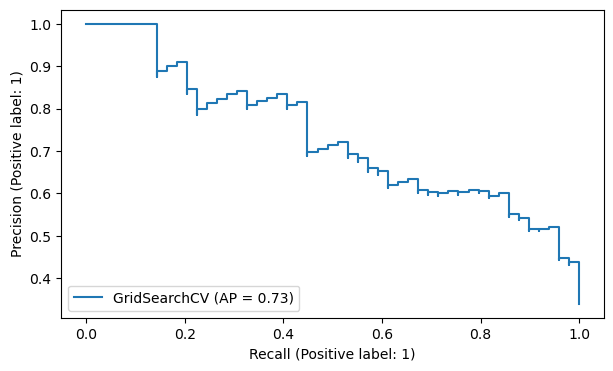

In [66]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);

# Overall performance of the RF model is much better than DT = 0.70

END OF THE PROJECT